In [3]:
import pandas as pd
import numpy as np
import pdb

data = pd.read_csv("company.csv", encoding='ANSI')

In [4]:
# 将超市客户分3组：普通用户、vip、SVIP

# 1. 筛选特征值【不是所有的特征都 有助于 结果分组】
train_X = data[["平均每次消费金额", "平均消费周期（天）"]]
train_X

平均每次消费金额  平均消费周期（天）
0        317         10
1        147         13
2        172         17
3        194         67
4        789         35
5        190          1
6        281         10
7        142         12
8        186          8
9        226          1
10       287         32
11       499          3
12       181         90
13       172          1
14       190         16
15       271         31
16       382         25
17       290          1
18       200         10
19        13         12
20        60          8
21        26          1

In [5]:
def k_means(center):
    # print(train_X)
    # train_X.values 数据部分--是二维数组；遍历即获得每行的数据
    label = []
    for sample in train_X[["平均每次消费金额", "平均消费周期（天）"]].values:
        # print(sample)
        # pdb.set_trace()
        dis = np.sqrt(((sample - center) ** 2).sum(axis=1))

        # 第一个样本的：[304.13319451 478.73165761 267.18720029]
        # 表明 第一个样本 属于类2
        # 找最小值所在的索引
        # print("距离", dis, "类别", dis.argmin())
        label.append(dis.argmin())
        # break

    train_X["组号"] = label
    # print("第一次聚类后\n", train_X)

    new_center = train_X.groupby(by="组号").mean()

    return new_center

In [14]:
# 随机初始化聚类中心
center = np.array([[13, 1],
                   [789, 90],
                   [50, 20],
                   [60,100]
                 ])

In [15]:
import matplotlib.pyplot as plt

In [16]:
timer = 0  # 记录次数
while True:
    timer += 1
    new_center = k_means(center)
    # pdb.set_trace()
    if np.all(center == new_center.values):
        break

    else:
        # 如果新旧聚类中心不一致；
        # 新的聚类中心  赋值  为旧的聚类中心
        center = new_center

print("聚类一共进行了", timer, "次")
train_X

聚类一共进行了 3 次


平均每次消费金额  平均消费周期（天）  组号
0        317         10   3
1        147         13   2
2        172         17   2
3        194         67   2
4        789         35   1
5        190          1   2
6        281         10   3
7        142         12   2
8        186          8   2
9        226          1   2
10       287         32   3
11       499          3   1
12       181         90   2
13       172          1   2
14       190         16   2
15       271         31   3
16       382         25   3
17       290          1   3
18       200         10   2
19        13         12   0
20        60          8   0
21        26          1   0

In [9]:
def show_result(train_data):
    make_list = ["o","*","d","r"]
    for i in range(3):
        part_data = train_data.loc[train_data["组号"]==i,["平均每次消费金额", "平均消费周期（天）"]]
        x_data = part_data["平均每次消费金额"]
        y_data = part_data["平均消费周期（天）"]
        plt.scatter(x_data, y_data, marker = make_list[i])
    plt.show()

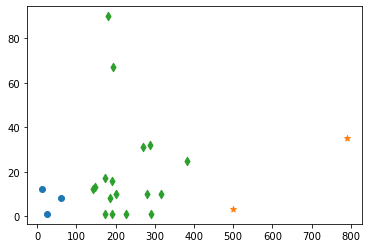

In [10]:
show_result(train_X)